<h1 style="color:#2bf0b5;"> <b>Neuroscience</b> HW4-3 - Lachin Naghashyar</h1>

---

<h2 style="color:#f06ff2;"> <b>Spike Triggered Average</b></h2>

1.

In [22]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.io

data = scipy.io.loadmat('Q3_data.mat')
spike_times = data['Spike_times']
stim = data['Stim']
print(spike_times.shape)
print(stim.shape)

(598, 1)
(1, 180000)


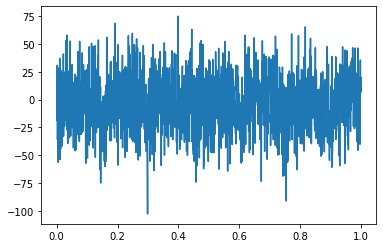

In [7]:
plt.plot(np.linspace(0, 1, 2000), stim[0, 0:2000])
plt.show()

2.choose 20 random rows and plot the sitm in those times (from 75 ms before the spiking time)


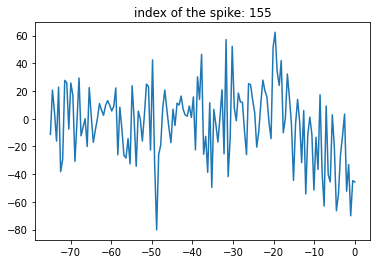

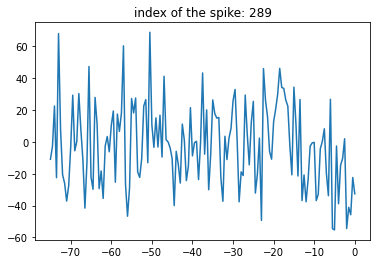

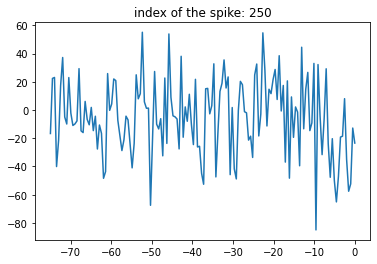

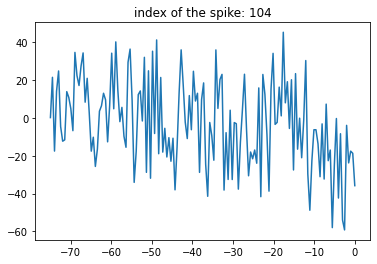

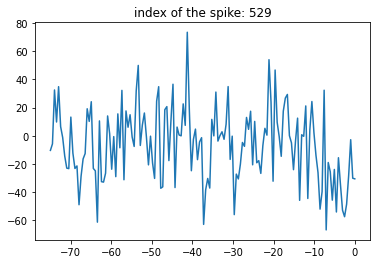

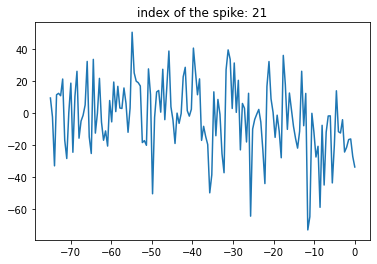

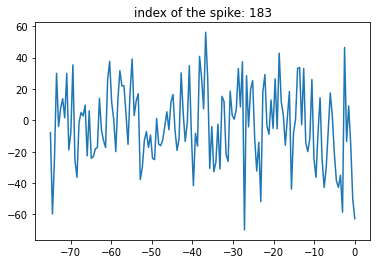

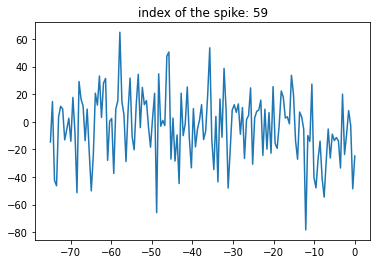

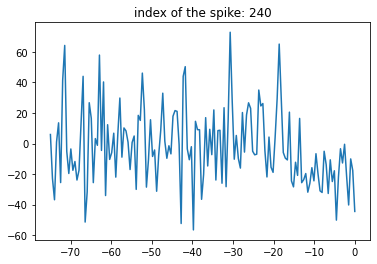

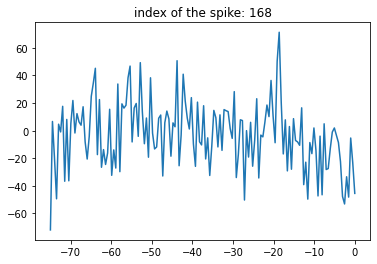

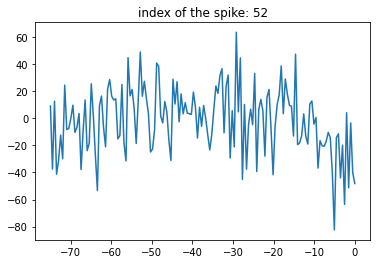

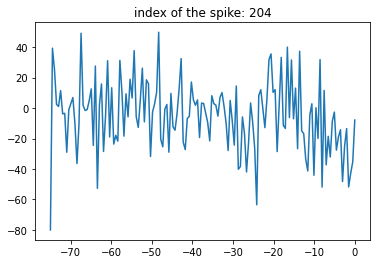

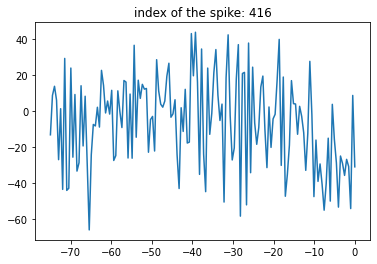

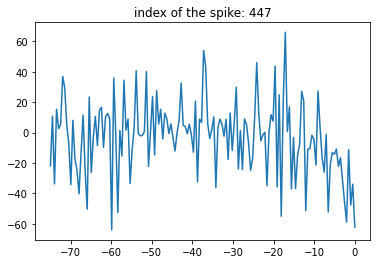

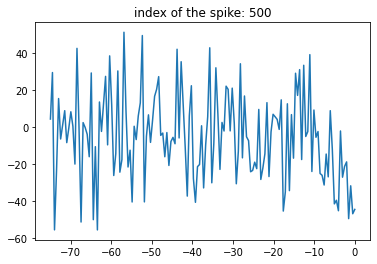

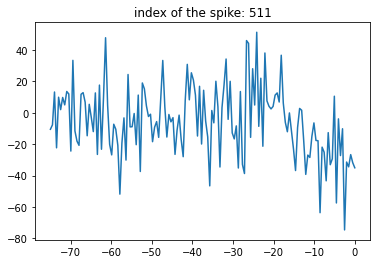

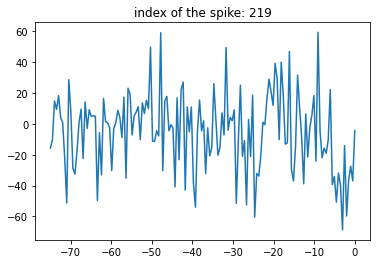

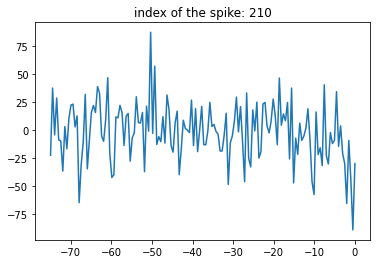

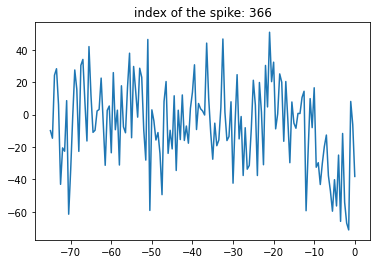

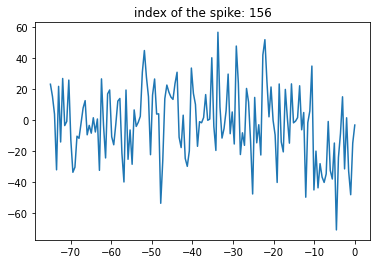

In [14]:
random_indices = np.random.choice(spike_times.shape[0], size=20, replace=False)
for indx in random_indices:
  spike_time = spike_times[indx]
  plt.title("index of the spike: "+str(indx))
  stim_spike =  stim[0, int((spike_time - 0.075) * 2000):int(spike_time*2000)]
  plt.plot(np.linspace(-75, 0, stim_spike.shape[0]),stim_spike)
  plt.show()

They all have fluctuations but it seems like they are all experiencing a rise in a time interval of [-20, -10] and then start to decrease after this time

3.

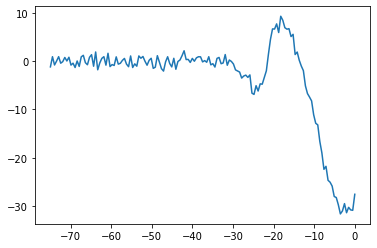

In [19]:
stim_75 = np.zeros((598, 149))
i = 0
for row in spike_times:
  spike_time = row[0]
  stim_75[i,:] = stim[0, int((spike_time - 0.075) * 2000):int(spike_time*2000)][0:149]
  i += 1

spike_triggered_average = np.mean(stim_75, axis=0)
plt.plot(np.linspace(-75, 0, spike_triggered_average.shape[0]),spike_triggered_average)
plt.show()

4.

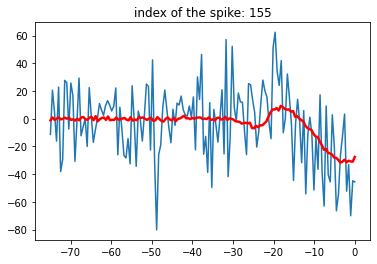

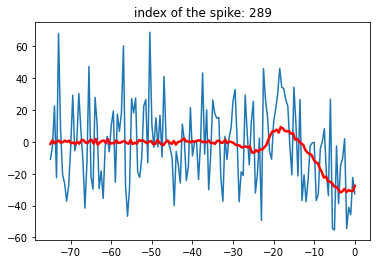

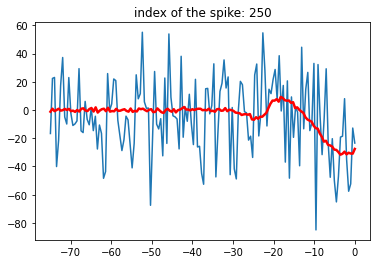

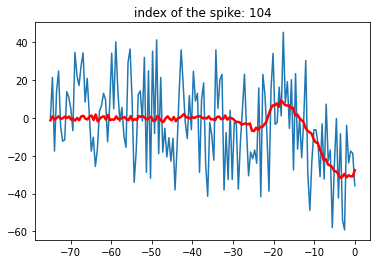

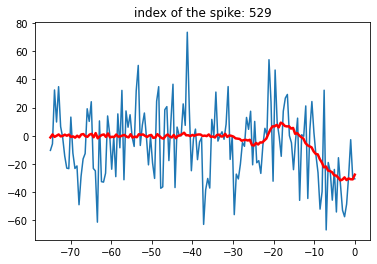

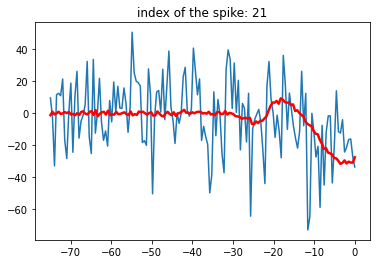

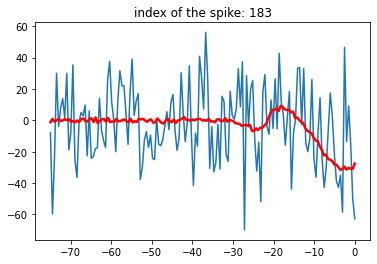

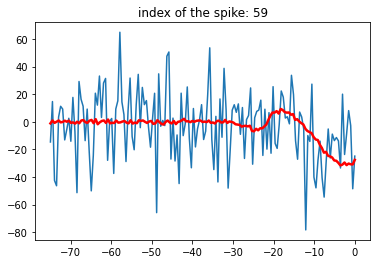

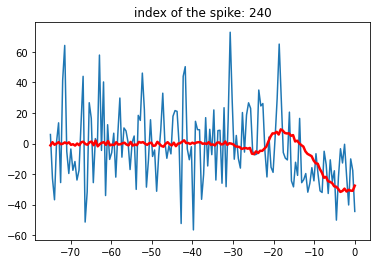

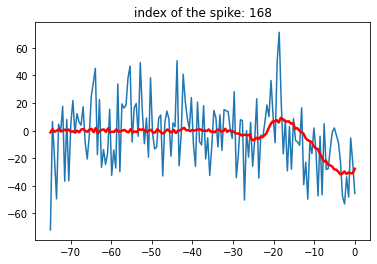

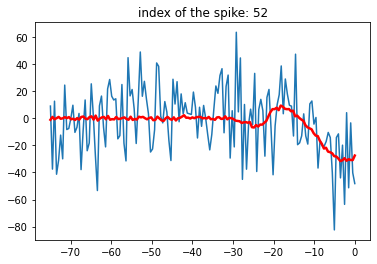

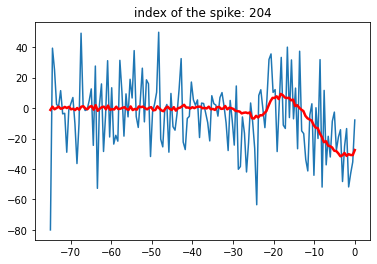

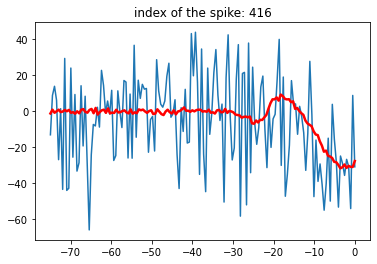

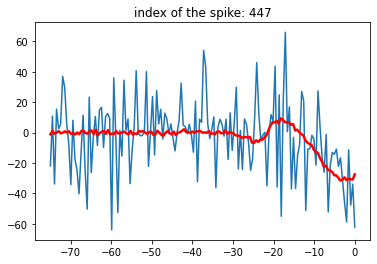

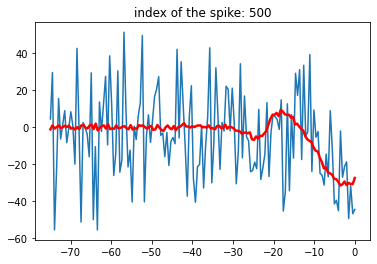

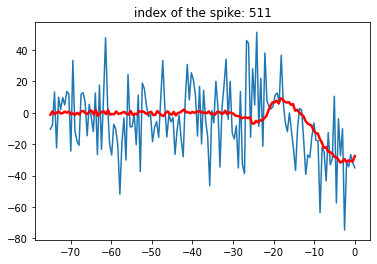

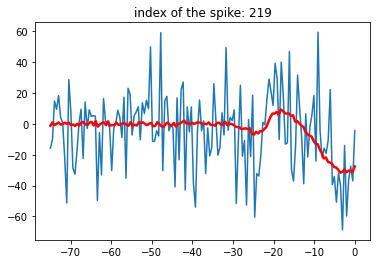

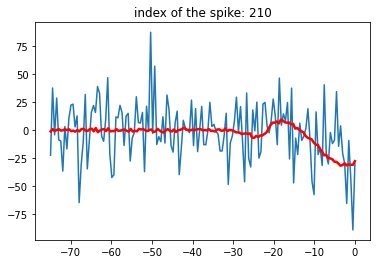

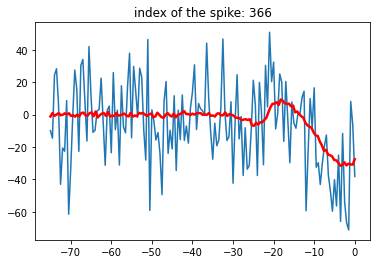

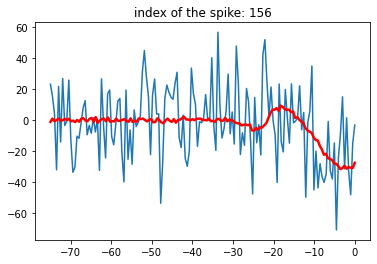

In [21]:
for indx in random_indices:
  spike_time = spike_times[indx]
  plt.title("index of the spike: "+str(indx))
  stim_spike =  stim[0, int((spike_time - 0.075) * 2000):int(spike_time*2000)]
  plt.plot(np.linspace(-75, 0, stim_spike.shape[0]),stim_spike)
  plt.plot(np.linspace(-75, 0, spike_triggered_average.shape[0]),spike_triggered_average,c='r',linewidth=2.5)
  plt.show()

5.Now we know that STA is the average value of the stimulus during some time interval before a spike occurs. Also 
note that this value ultimately characterizes the level of stimulus necessary for the neuron to fire. It is 
measuring the average level of the stimulus(not of the neuron). Moreover, as you can see, they all almost follow the
same pattern as STA. This way, by seeing a rise and a fall, we can estimate the approximate time of a spike. 
However, it is not completely clear, and we can not predict an exact time of a spike. (Though we can predict the 
time interval needed for a spike as it is almost the same for all of them). 

We can also take a look at page 6 in this link (
http://faculty.washington.edu/etsb/AMATH342/materials/lec_2_Spike_Triggered_Averages_2018.pdf) which used the dot 
product of stim and STA to predict the neural firing.